In [1]:
pip install mplcursors

In [2]:
 pip install cartopy

In [3]:
# SEA SURSACE TEPERATURE

import xarray as xr
import matplotlib.pyplot as plt

# Load the NetCDF file
data = xr.open_dataset('/content/drive/MyDrive/Biporjoy_project_data/Biporjoy_May_June_July.nc')
data


<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 90, time: 2208)
Coordinates:
  * longitude  (longitude) float32 60.1 60.35 60.6 60.85 ... 79.6 79.85 80.1
  * latitude   (latitude) float32 27.85 27.6 27.35 27.1 ... 6.35 6.1 5.85 5.6
  * time       (time) datetime64[ns] 2023-05-01 ... 2023-07-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-09 11:00:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
# Extract relevant variables
sst = data['sst']
u10 = data['u10']
v10 = data['v10']

### **Mean Sea Surface Temperature from 01.05.2023 to 30.06.2023**

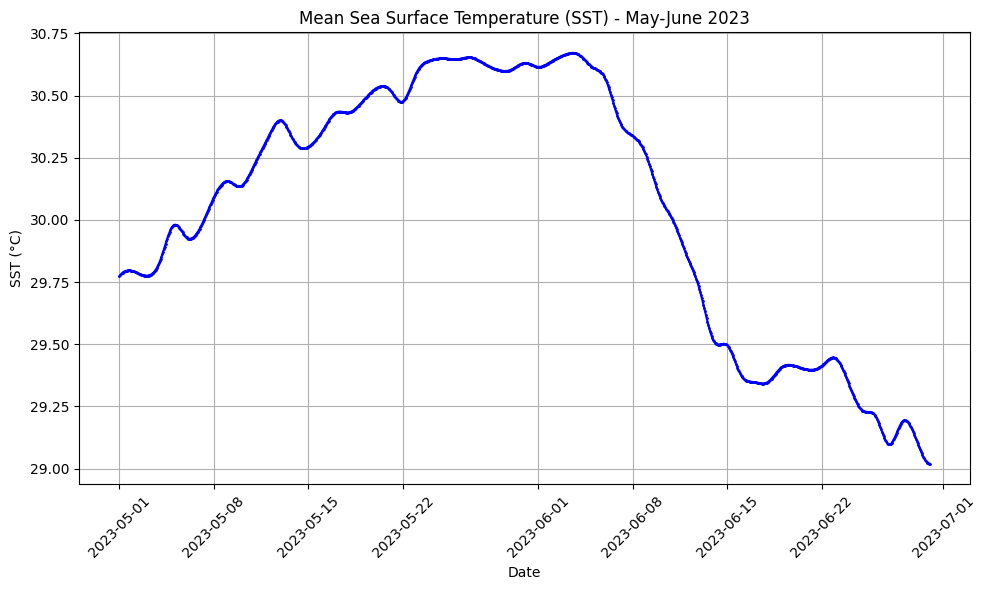

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.dates as mdates

# Assuming your dataset is named 'ds'
# Extract SST data for the specified time range
sst_june = data.sel(time=slice('2023-05-01', '2023-06-30')).sst - 273.15

# Calculate the mean SST for each day
mean_sst_daily = sst_june.mean(dim=('latitude', 'longitude'))

# Extract time values
time_values = mean_sst_daily.time.values.astype('datetime64[D]').astype(float)

# Ensure time values are unique
time_values_unique, idx = np.unique(time_values, return_index=True)
mean_sst_unique = mean_sst_daily.values[idx]

# Interpolate the data for a smoother plot
interp_func = interp1d(time_values_unique, mean_sst_unique, kind='cubic')

# New time values for interpolation
new_time_values = np.linspace(time_values_unique.min(), time_values_unique.max(), 1000)

# Interpolate the data
interp_sst = interp_func(new_time_values)

# Convert floating-point time values to datetime objects
time_dates = mdates.num2date(new_time_values)

# Plotting with different marker sizes
plt.figure(figsize=(10, 6))
plt.plot(time_dates, interp_sst, color='blue', marker='o', linestyle='-', markersize=1)  # Adjust markersize here
plt.title('Mean Sea Surface Temperature (SST) - May-June 2023')
plt.xlabel('Date')
plt.ylabel('SST (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Mean Sea Surface Temperature (01.06.2023 to 20.06.2023)**

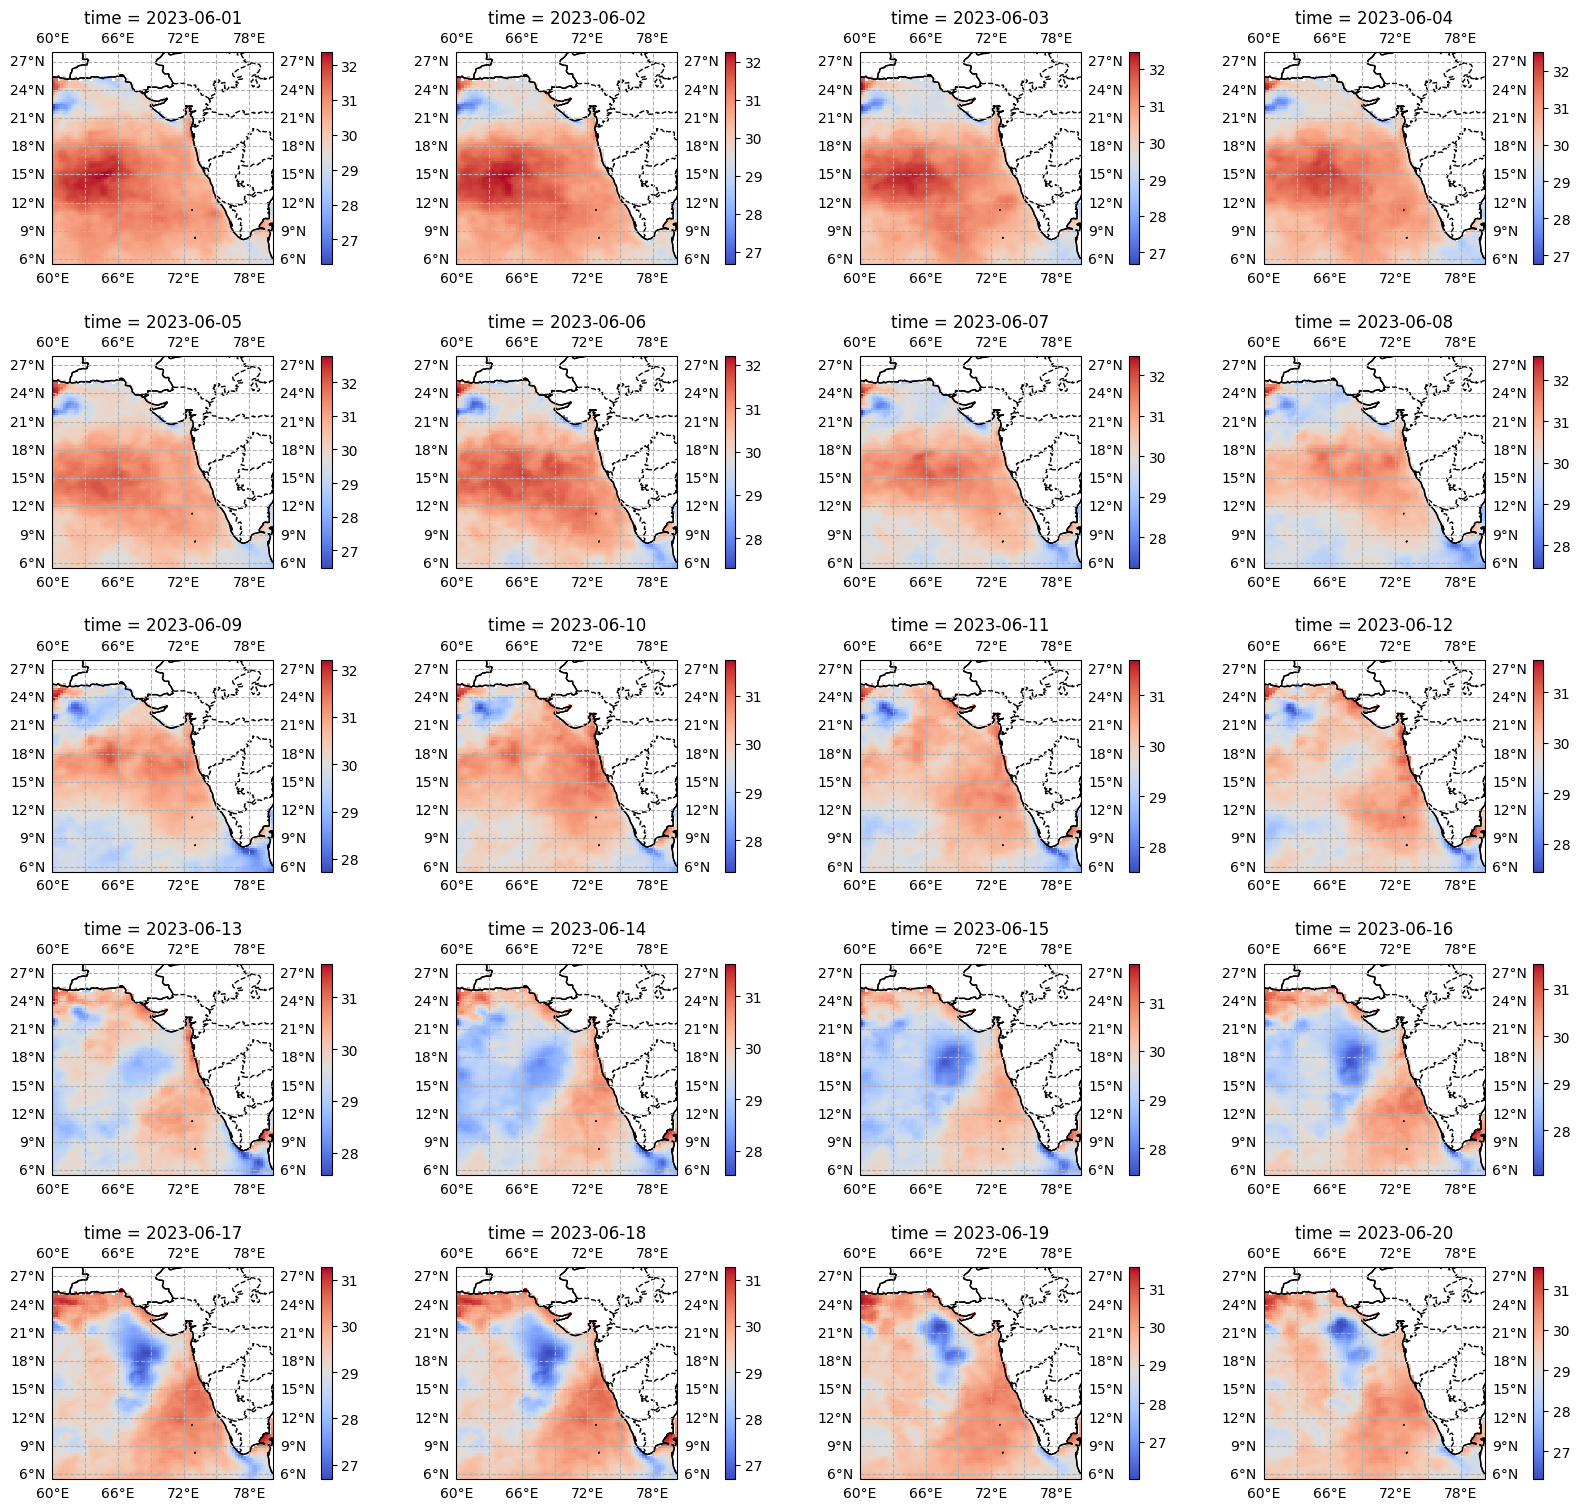

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Define the time range for June 1 to June 19, 2023
time_range = pd.date_range(start='2023-06-01', end='2023-06-20')

# Calculate the number of rows and columns needed
num_rows = len(time_range) // 4  # Each row will contain 4 images
if len(time_range) % 4 != 0:
    num_rows += 1  # Add an extra row if the number of images is not a multiple of 4

# Create subplots with the specified layout
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows * 3), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Iterate over each date
for i, date in enumerate(time_range):
    # Select data for the specific date and convert SST to Celsius
    sst_daily = sst.sel(time=date) - 273.15

    # Plot mean SST data
    ax = axes[i]
    ax.set_title(date.strftime('%Y-%m-%d'))
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_aspect('auto')

    # Plot SST data
    im = sst_daily.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)

    # Add coastlines, state boundaries, and country boundaries
    ax.coastlines()
    states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
    ax.add_feature(states, edgecolor='black', linestyle='--')
    countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
    ax.add_feature(countries, edgecolor='black', linestyle='-')

    # Add latitude and longitude scales on bottom x and left y axes
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top = True
    gl.ylabels_right = False

    # Format latitude and longitude labels
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Add colorbar with adjusted padding
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.15)  # Adjust the pad value as needed

# Adjust layout and show plot with adjustable padding
plt.tight_layout(w_pad=3.5, h_pad=3.5)  # You can adjust these values as per your choice
plt.show()


### **Difference Mean Sea Surface Temperature (01.06.2023 to 20.06.2023)**

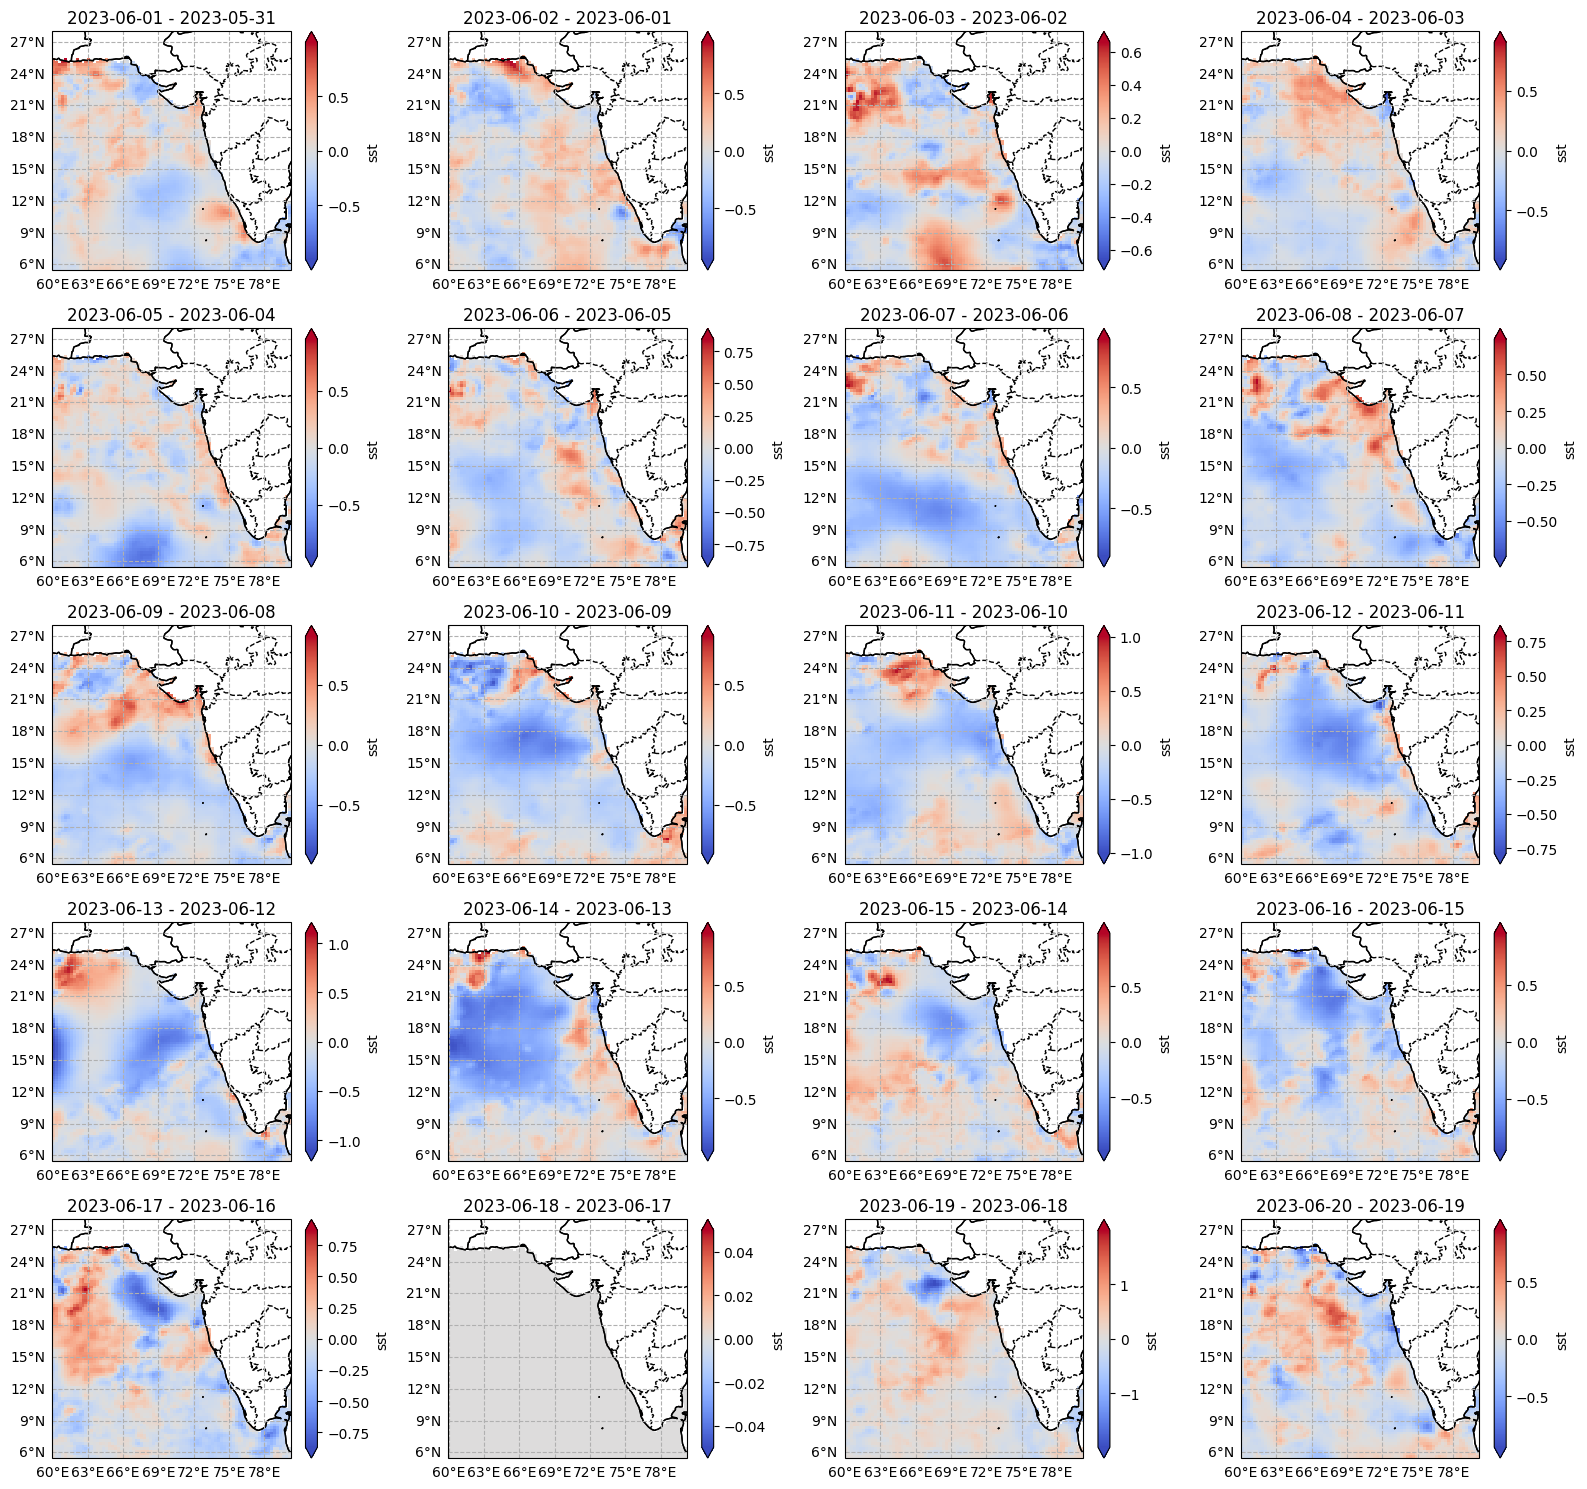

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Define the time range
time_range = pd.date_range(start='2023-06-01', end='2023-06-20')

# Create subplots with 4 images in each horizontal row
num_rows = len(time_range) // 4  # Calculate the number of rows needed
if len(time_range) % 4 != 0:
    num_rows += 1  # Add an extra row if the number of images is not a multiple of 4

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows * 3), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array to iterate over all subplots

# Iterate over each date
for i, date in enumerate(time_range):
    # Select SST data for the specific date (replace this with your data)
    sst_one_day = data.sst.sel(time=date, method='nearest')
    sst_last_date = data.sst.sel(time=date - pd.Timedelta(days=1), method='nearest')

    # Calculate the difference in SST
    sst_diff = sst_one_day - sst_last_date

    # Plot SST difference data
    ax = axes[i]
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_aspect('auto')

    # Plot SST difference data with color scale
    im = sst_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

    # Add coastlines, state boundaries, and country boundaries
    ax.coastlines()
    states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
    ax.add_feature(states, edgecolor='black', linestyle='--')
    countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
    ax.add_feature(countries, edgecolor='black', linestyle='-')

    # Set title for each subplot
    ax.set_title(f'{date.strftime("%Y-%m-%d")} - {(date - pd.Timedelta(days=1)).strftime("%Y-%m-%d")}')

    # Add latitude and longitude scales
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### **Mean Sea Surface Temperature with Trajectory (01.06.2023 to 20.06.2023)**

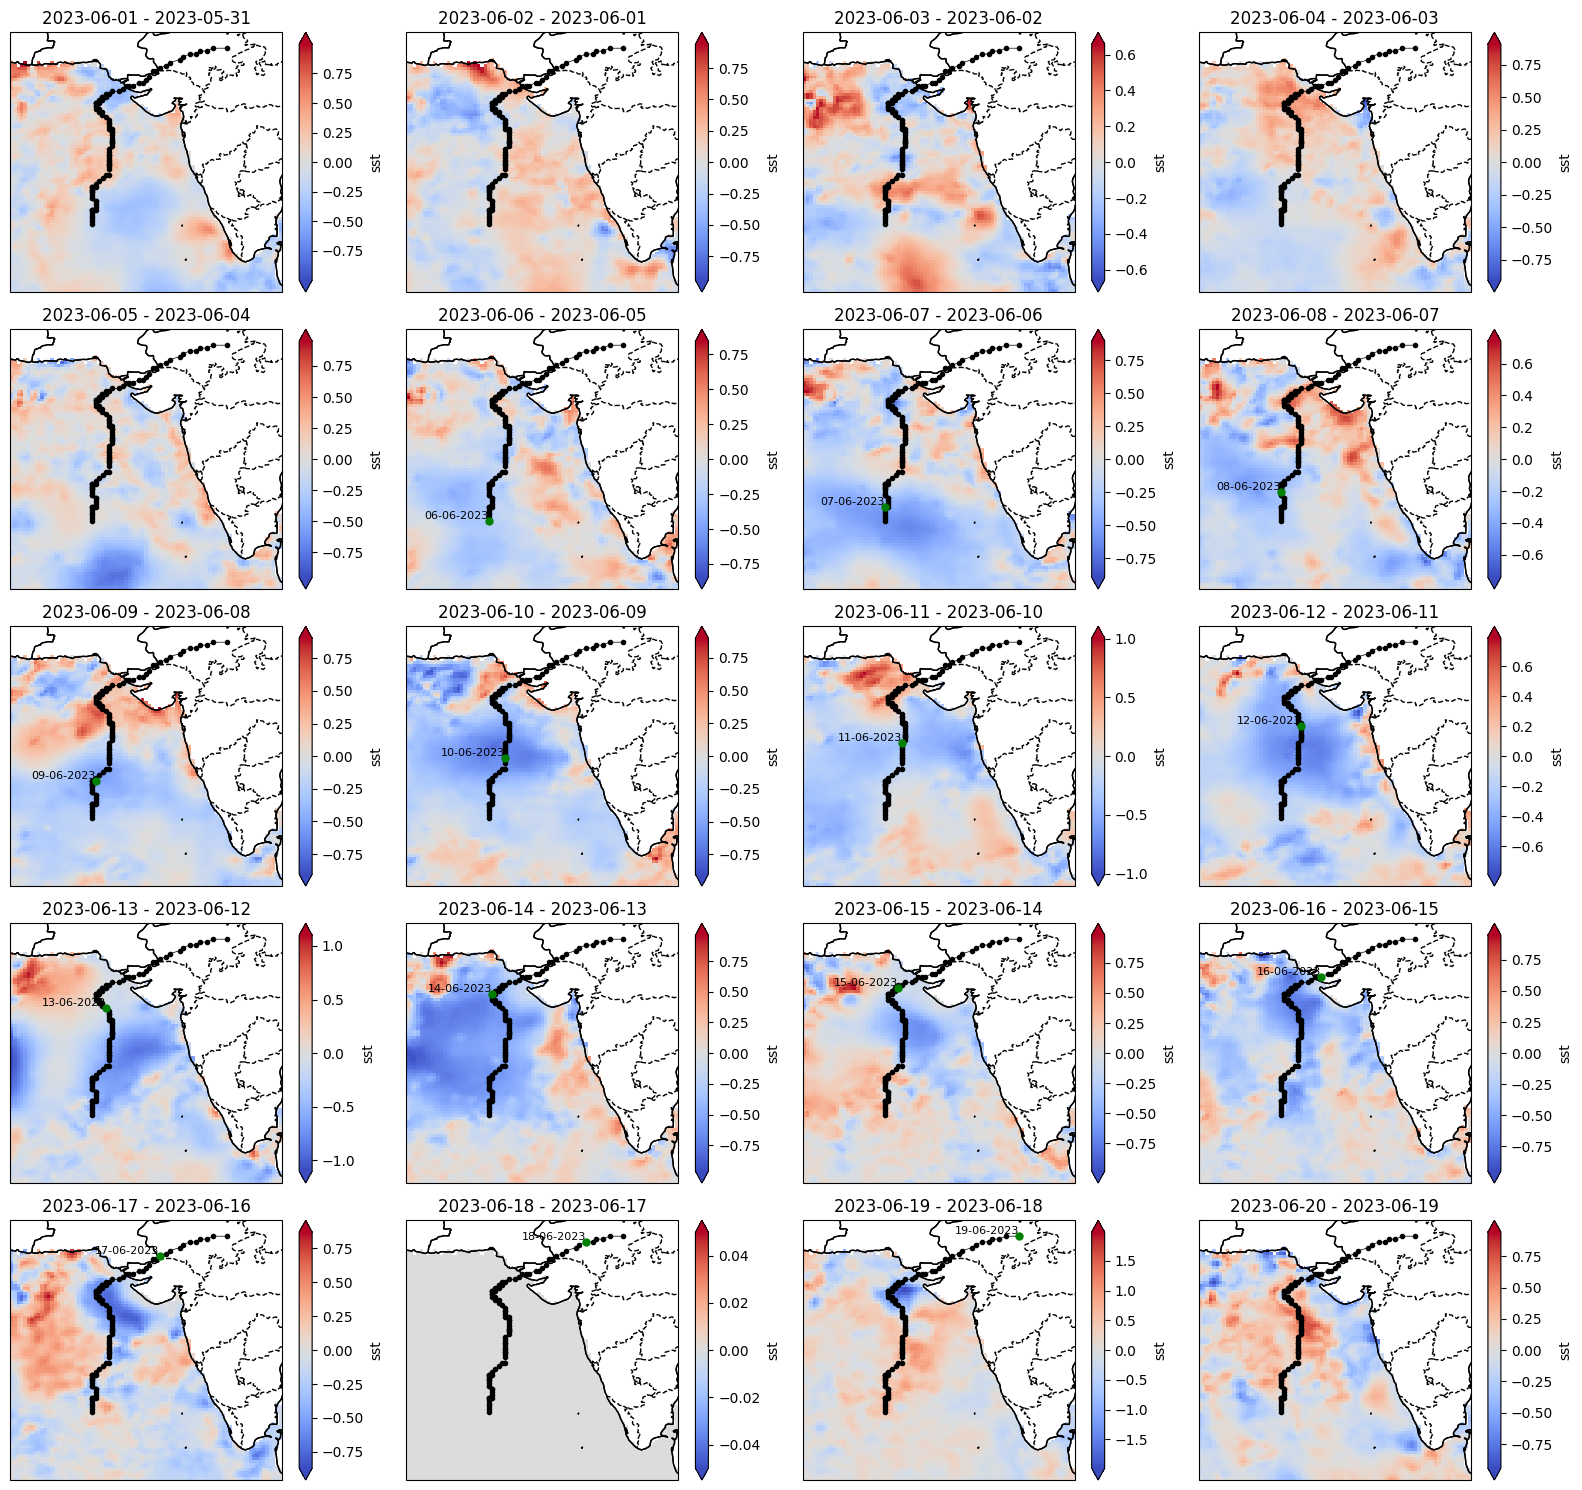

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import mplcursors

cyclone_data = pd.read_csv('/content/drive/MyDrive/Biporjoy_project_data/Biporjoy_cyclone_track.csv')

# Define the time range
time_range = pd.date_range(start='2023-06-01', end='2023-06-20')

# Create subplots with 4 images in each horizontal row
num_rows = len(time_range) // 4  # Calculate the number of rows needed
if len(time_range) % 4 != 0:
    num_rows += 1  # Add an extra row if the number of images is not a multiple of 4

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows * 3), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten the axes array to iterate over all subplots

# Iterate over each date
for i, date in enumerate(time_range):
    # Select SST data for the specific date
    sst_one_day = data.sst.sel(time=date, method='nearest')
    sst_last_date = data.sst.sel(time=date - pd.Timedelta(days=1), method='nearest')

    # Calculate the difference in SST
    sst_diff = sst_one_day - sst_last_date

    # Plot SST difference data
    ax = axes[i]
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_aspect('auto')

    # Plot SST difference data with color scale
    sst_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

    # Add coastlines, state boundaries, and country boundaries
    ax.coastlines()
    states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
    ax.add_feature(states, edgecolor='black', linestyle='--')
    countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
    ax.add_feature(countries, edgecolor='black', linestyle='-')

    # Set title for each subplot
    ax.set_title(f'{date.strftime("%Y-%m-%d")} - {(date - pd.Timedelta(days=1)).strftime("%Y-%m-%d")}')

    # Plot full cyclone trajectory
    ax.plot(cyclone_data['Longitude'], cyclone_data['Latitude'], color='black', marker='o', markersize=3, linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())

    # Filter cyclone data for the current date and time "0:00:00"
    cyclone_date = date.strftime("%d-%m-%Y")
    filtered_cyclone_data = cyclone_data[(cyclone_data['Date'] == cyclone_date) & (cyclone_data['Time (UTC)'] == '0:00:00')]

    # Plot cyclone positions for the current date with a different color
    ax.plot(filtered_cyclone_data['Longitude'], filtered_cyclone_data['Latitude'], color='green', marker='o', markersize=5, linestyle='None', transform=ccrs.PlateCarree())

    # Add date labels only for the highlighted cyclone position
    for index, row in filtered_cyclone_data.iterrows():
        ax.text(row['Longitude'], row['Latitude'], row['Date'], fontsize=8, transform=ccrs.PlateCarree(), ha='right', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### **Difference in SST of 2023-06-10 and 2023-06-09**

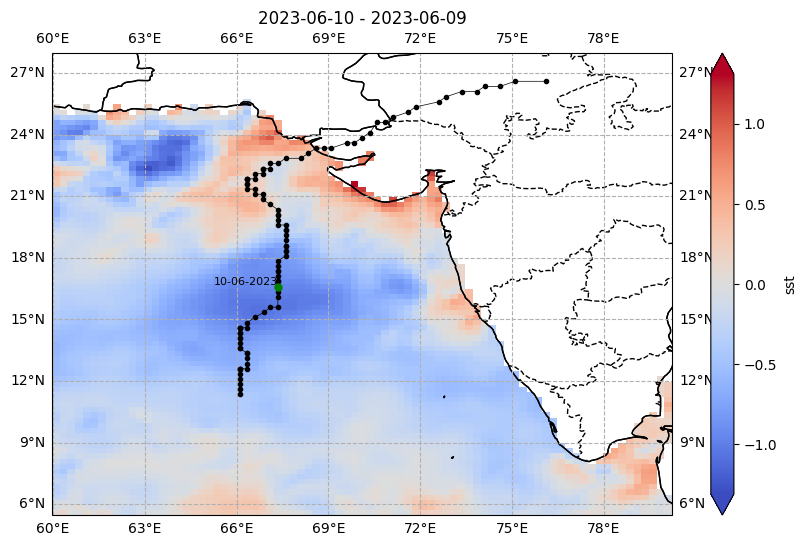

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Define the time range
time_range = pd.date_range(start='2023-06-09', end='2023-06-10')

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Select SST data for the specific date range
sst_one_day = data.sst.sel(time=time_range[-1], method='nearest')
sst_last_date = data.sst.sel(time=time_range[0] - pd.Timedelta(days=1), method='nearest')

# Calculate the difference in SST
sst_diff = sst_one_day - sst_last_date

# Plot SST difference data
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('auto')

# Plot SST difference data with color scale
sst_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines, state boundaries, and country boundaries
ax.coastlines()
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black', linestyle='-')

# Add grid lines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False  # Hide top longitude labels
gl.ylabels_right = False  # Hide right latitude labels

# Set title for the subplot
ax.set_title(f'{time_range[-1].strftime("%Y-%m-%d")} - {time_range[0].strftime("%Y-%m-%d")}')

# Plot full cyclone trajectory
ax.plot(cyclone_data['Longitude'], cyclone_data['Latitude'], color='black', marker='o', markersize=3, linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())

# Filter cyclone data for the specified date range and time "0:00:00"
filtered_cyclone_data = cyclone_data[(cyclone_data['Date'] == time_range[-1].strftime("%d-%m-%Y")) & (cyclone_data['Time (UTC)'] == '0:00:00')]

# Plot cyclone positions for the specified date range with a different color
ax.plot(filtered_cyclone_data['Longitude'], filtered_cyclone_data['Latitude'], color='green', marker='o', markersize=5, linestyle='None', transform=ccrs.PlateCarree())

# Add date labels only for the highlighted cyclone position
for index, row in filtered_cyclone_data.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Date'], fontsize=8, transform=ccrs.PlateCarree(), ha='right', va='bottom')

plt.show()


### **Difference in SST of 2023-06-11 and 2023-06-10**

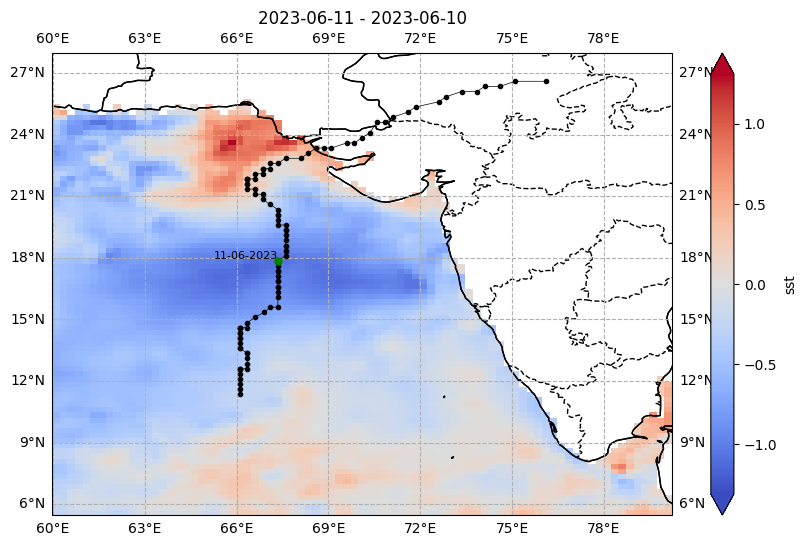

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Define the time range
time_range = pd.date_range(start='2023-06-10', end='2023-06-11')

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Select SST data for the specific date range
sst_one_day = data.sst.sel(time=time_range[-1], method='nearest')
sst_last_date = data.sst.sel(time=time_range[0] - pd.Timedelta(days=1), method='nearest')

# Calculate the difference in SST
sst_diff = sst_one_day - sst_last_date

# Plot SST difference data
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('auto')

# Plot SST difference data with color scale
sst_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines, state boundaries, and country boundaries
ax.coastlines()
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black', linestyle='-')

# Add grid lines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False  # Hide top longitude labels
gl.ylabels_right = False  # Hide right latitude labels

# Set title for the subplot
ax.set_title(f'{time_range[-1].strftime("%Y-%m-%d")} - {time_range[0].strftime("%Y-%m-%d")}')

# Plot full cyclone trajectory
ax.plot(cyclone_data['Longitude'], cyclone_data['Latitude'], color='black', marker='o', markersize=3, linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())

# Filter cyclone data for the specified date range and time "0:00:00"
filtered_cyclone_data = cyclone_data[(cyclone_data['Date'] == time_range[-1].strftime("%d-%m-%Y")) & (cyclone_data['Time (UTC)'] == '0:00:00')]

# Plot cyclone positions for the specified date range with a different color
ax.plot(filtered_cyclone_data['Longitude'], filtered_cyclone_data['Latitude'], color='green', marker='o', markersize=5, linestyle='None', transform=ccrs.PlateCarree())

# Add date labels only for the highlighted cyclone position
for index, row in filtered_cyclone_data.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Date'], fontsize=8, transform=ccrs.PlateCarree(), ha='right', va='bottom')

plt.show()


### **Difference in SST of 2023-06-10 and 2023-06-09**

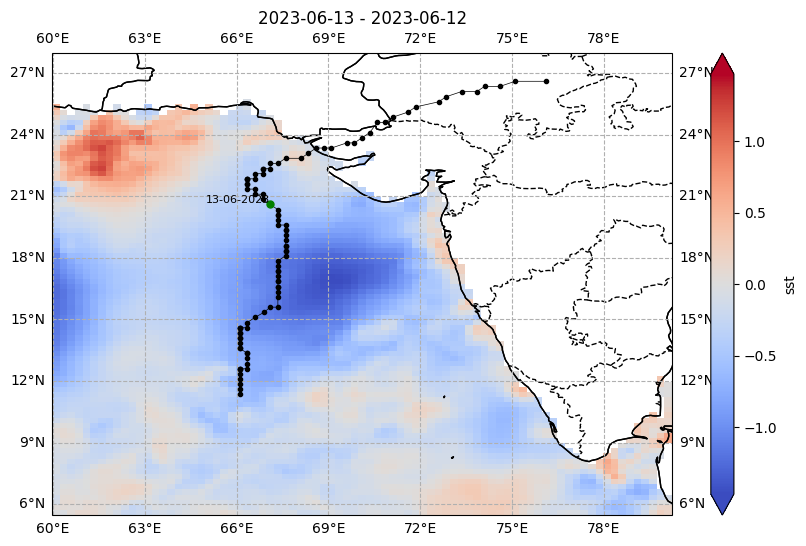

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Define the time range
time_range = pd.date_range(start='2023-06-12', end='2023-06-13')

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Select SST data for the specific date range
sst_one_day = data.sst.sel(time=time_range[-1], method='nearest')
sst_last_date = data.sst.sel(time=time_range[0] - pd.Timedelta(days=1), method='nearest')

# Calculate the difference in SST
sst_diff = sst_one_day - sst_last_date

# Plot SST difference data
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('auto')

# Plot SST difference data with color scale
sst_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines, state boundaries, and country boundaries
ax.coastlines()
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black', linestyle='-')

# Add grid lines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False  # Hide top longitude labels
gl.ylabels_right = False  # Hide right latitude labels

# Set title for the subplot
ax.set_title(f'{time_range[-1].strftime("%Y-%m-%d")} - {time_range[0].strftime("%Y-%m-%d")}')

# Plot full cyclone trajectory
ax.plot(cyclone_data['Longitude'], cyclone_data['Latitude'], color='black', marker='o', markersize=3, linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())

# Filter cyclone data for the specified date range and time "0:00:00"
filtered_cyclone_data = cyclone_data[(cyclone_data['Date'] == time_range[-1].strftime("%d-%m-%Y")) & (cyclone_data['Time (UTC)'] == '0:00:00')]

# Plot cyclone positions for the specified date range with a different color
ax.plot(filtered_cyclone_data['Longitude'], filtered_cyclone_data['Latitude'], color='green', marker='o', markersize=5, linestyle='None', transform=ccrs.PlateCarree())

# Add date labels only for the highlighted cyclone position
for index, row in filtered_cyclone_data.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Date'], fontsize=8, transform=ccrs.PlateCarree(), ha='right', va='bottom')

plt.show()


### **Cyclone Trajectory with base map of mean SST of cyclone period**

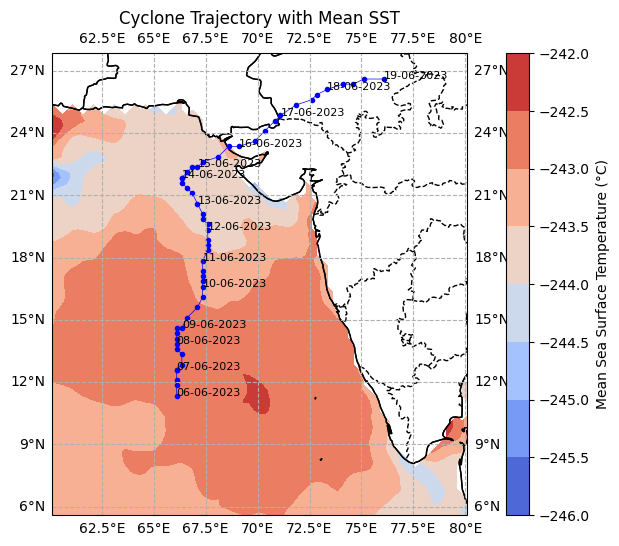

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import mplcursors

# Read the cyclone trajectory data
cyclone_data = pd.read_csv('/content/drive/MyDrive/Biporjoy_project_data/Biporjoy_cyclone_track.csv')

# Calculate the mean SST for each day
sst_mean_per_day = sst_june.mean(dim='time') - 273.15

# Filter data for specific times (0:00:00, 6:00:00, 12:00:00, 18:00:00)
times_to_plot = ['0:00:00', '6:00:00', '12:00:00', '18:00:00']
filtered_data = cyclone_data[cyclone_data['Time (UTC)'].isin(times_to_plot)]

# Extract latitude and longitude columns
cyclone_latitude = filtered_data['Latitude'].tolist()
cyclone_longitude = filtered_data['Longitude'].tolist()

# Plot mean SST data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(sst_mean_per_day.coords['longitude'], sst_mean_per_day.coords['latitude'], sst_mean_per_day, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.colorbar(label='Mean Sea Surface Temperature (°C)')
plt.title('Cyclone Trajectory with Mean SST')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.coastlines()

# Plot cyclone trajectory
plt.plot(cyclone_longitude, cyclone_latitude, color='blue', marker='o', markersize=3, linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())

# Add date, time, and wind speed information on hover
cursor = mplcursors.cursor(hover=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(f"Date: {filtered_data['Date'][sel.target.index]}, Time: {filtered_data['Time (UTC)'][sel.target.index]}, Wind Speed: {calculate_wind_speed(filtered_data['U'][sel.target.index], filtered_data['V'][sel.target.index])}"))

# Add labels to the cyclone trajectory points for date '0:00:00' only
for i, date_time in enumerate(zip(filtered_data['Date'], filtered_data['Time (UTC)'])):
    date, time = date_time
    if time == '0:00:00':
        plt.text(cyclone_longitude[i], cyclone_latitude[i], date, color='black', fontsize=8, transform=ccrs.PlateCarree())


# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add country boundaries
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black', linestyle='-')


plt.show()


### **Cyclone trajectory with 5 degree spaced square boxes over each day**

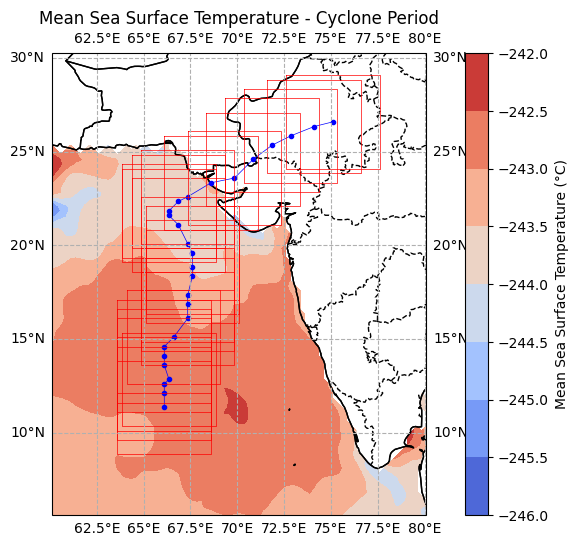

Number of points plotted: 27
Time (UTC) used in plotting points: ['0:00:00', '6:00:00', '12:00:00', '18:00:00']


In [13]:
import numpy as np

# Filter cyclone trajectory data for the specified times
selected_times = ['0:00:00', '6:00:00', '12:00:00', '18:00:00']
selected_cyclone_latitude = []
selected_cyclone_longitude = []

for time, lat, lon in zip(cyclone_data['Time (UTC)'], cyclone_latitude, cyclone_longitude):
    if time in selected_times:
        selected_cyclone_latitude.append(lat)
        selected_cyclone_longitude.append(lon)

# Function to calculate coordinates of a square around a point
def calculate_square_coordinates(latitude, longitude, distance):
    # Convert latitude and longitude from degrees to radians
    lat_rad = np.deg2rad(latitude)
    lon_rad = np.deg2rad(longitude)

    # Calculate offsets for square corners
    offset = np.deg2rad(distance / 2)

    # Calculate coordinates of square corners
    square_lat = [np.rad2deg(lat_rad + offset), np.rad2deg(lat_rad + offset), np.rad2deg(lat_rad - offset), np.rad2deg(lat_rad - offset)]
    square_lon = [np.rad2deg(lon_rad - offset), np.rad2deg(lon_rad + offset), np.rad2deg(lon_rad + offset), np.rad2deg(lon_rad - offset)]

    return square_lat, square_lon

# Plot cyclone trajectory and squares around each point
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(sst_mean_per_day.coords['longitude'], sst_mean_per_day.coords['latitude'], sst_mean_per_day, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.colorbar(label='Mean Sea Surface Temperature (°C)')
plt.title('Mean Sea Surface Temperature - Cyclone Period')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.coastlines()

# Plot cyclone trajectory
plt.plot(selected_cyclone_longitude, selected_cyclone_latitude, color='blue', marker='o', markersize=3, linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())

# Plot squares around each point
for lat, lon in zip(selected_cyclone_latitude, selected_cyclone_longitude):
    square_lat, square_lon = calculate_square_coordinates(lat, lon, 5)
    plt.plot(square_lon + [square_lon[0]], square_lat + [square_lat[0]], color='red', linestyle='-', linewidth=0.5, transform=ccrs.PlateCarree())


# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add country boundaries
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(countries, edgecolor='black', linestyle='-')


plt.show()

# Count the number of points plotted
num_points = len(selected_cyclone_latitude)
print("Number of points plotted:", num_points)

# Find the time (UTC) used in plotting the points
print("Time (UTC) used in plotting points:", selected_times)


### **Calcutate Mean SST within box**

In [14]:
import numpy as np
import pandas as pd

# Define a function to calculate mean SST within each square
def calculate_sst_within_square(sst_data, lon, lat, square_size=10):
    sst_within_square = []
    for lon_point, lat_point in zip(lon, lat):
        # Calculate indices of SST data within the square
        lon_indices = np.where((sst_data.coords['longitude'] >= lon_point - square_size/2) &
                               (sst_data.coords['longitude'] <= lon_point + square_size/2))[0]
        lat_indices = np.where((sst_data.coords['latitude'] >= lat_point - square_size/2) &
                               (sst_data.coords['latitude'] <= lat_point + square_size/2))[0]

        # Calculate mean SST within the square
        sst_mean_kelvin = sst_data.sel(longitude=sst_data.coords['longitude'][lon_indices],
                                       latitude=sst_data.coords['latitude'][lat_indices]).mean().values
        sst_mean_celsius = sst_mean_kelvin - 273.15  # Convert from Kelvin to Celsius
        sst_within_square.append(sst_mean_celsius)

    return sst_within_square

# Select the time range for June 6 to June 19, 2023
sst_june = sst.sel(time=slice('2023-06-06', '2023-06-19'))

# Calculate the mean SST for each day
sst_mean_per_day = sst_june.mean(dim='time')

# Calculate SST within each square
sst_within_square = calculate_sst_within_square(sst_mean_per_day, cyclone_longitude, cyclone_latitude)



# Create a table containing latitude, longitude, and SST
table_data = {'Latitude': cyclone_latitude, 'Longitude': cyclone_longitude, 'SST (°C)': sst_within_square}
table_df = pd.DataFrame(table_data)

print(table_df)


    Latitude  Longitude   SST (°C)
0      11.35      66.10  29.857874
1      11.85      66.10  29.862482
2      12.10      66.10  29.865045
3      12.60      66.10  29.869379
4      12.60      66.10  29.869379
5      12.85      66.35  29.892023
6      13.35      66.35  29.889734
7      13.60      66.10  29.865106
8      13.85      66.10  29.860529
9      14.10      66.10  29.856531
10     14.35      66.10  29.852960
11     14.60      66.10  29.849420
12     14.60      66.35  29.868188
13     15.10      66.60  29.876337
14     15.60      67.10  29.897974
15     16.10      67.35  29.899377
16     16.60      67.35  29.875818
17     16.85      67.35  29.863123
18     17.10      67.35  29.849817
19     17.35      67.35  29.837000
20     17.85      67.35  29.815698
21     18.35      67.60  29.822260
22     18.60      67.60  29.816125
23     18.85      67.60  29.810602
24     19.35      67.60  29.799310
25     19.60      67.60  29.792596
26     19.85      67.35  29.765466
27     20.10      67

### **Calculate wind speed at each point on trajectory **

In [15]:
import numpy as np
import pandas as pd

# Define a function to calculate mean wind speed within each square
def calculate_wind_speed_within_square(u10_data, v10_data, lon, lat, square_size=10):
    wind_speed_within_square = []
    for lon_point, lat_point in zip(lon, lat):
        # Calculate indices of u10 and v10 data within the square
        lon_indices = np.where((u10_data.coords['longitude'] >= lon_point - square_size/2) &
                               (u10_data.coords['longitude'] <= lon_point + square_size/2))[0]
        lat_indices = np.where((u10_data.coords['latitude'] >= lat_point - square_size/2) &
                               (u10_data.coords['latitude'] <= lat_point + square_size/2))[0]

        # Extract u10 and v10 data within the square
        u10_within_square = u10_data.sel(longitude=u10_data.coords['longitude'][lon_indices],
                                         latitude=u10_data.coords['latitude'][lat_indices])
        v10_within_square = v10_data.sel(longitude=v10_data.coords['longitude'][lon_indices],
                                         latitude=v10_data.coords['latitude'][lat_indices])

        # Calculate wind speed within the square using the formula: sqrt(u^2 + v^2)
        wind_speed_within_square.append(np.sqrt(u10_within_square**2 + v10_within_square**2).mean().values)

    return wind_speed_within_square

# Select the time range for June 6 to June 19, 2023
u10_june = u10.sel(time=slice('2023-06-10', '2023-06-16'))
v10_june = v10.sel(time=slice('2023-06-10', '2023-06-16'))

# Calculate wind speed within each square
wind_speed_within_square = calculate_wind_speed_within_square(u10_june, v10_june, cyclone_longitude, cyclone_latitude)

# Create a table containing latitude, longitude, and mean wind speed
table_data = {'Latitude': cyclone_latitude, 'Longitude': cyclone_longitude, 'Mean Wind Speed (m/s)': wind_speed_within_square}
table_df = pd.DataFrame(table_data)

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print the full output in table format
print(table_df)


    Latitude  Longitude Mean Wind Speed (m/s)
0      11.35      66.10             11.613579
1      11.85      66.10             11.899997
2      12.10      66.10              12.03813
3      12.60      66.10             12.300959
4      12.60      66.10             12.300959
5      12.85      66.35              12.33896
6      13.35      66.35             12.570792
7      13.60      66.10             12.758507
8      13.85      66.10             12.856804
9      14.10      66.10             12.948374
10     14.35      66.10              13.03211
11     14.60      66.10             13.107333
12     14.60      66.35             13.037151
13     15.10      66.60             13.100292
14     15.60      67.10             13.064456
15     16.10      67.35             13.054343
16     16.60      67.35             13.046147
17     16.85      67.35             13.015389
18     17.10      67.35             12.973182
19     17.35      67.35              12.92058
20     17.85      67.35           

### **Arabian Sea**

In [16]:
import xarray as xr
import matplotlib.pyplot as plt

data_30_years_AS = xr.open_dataset("/content/drive/MyDrive/Biporjoy_project_data/years_30_data.nc")
data_30_years_AS

<xarray.Dataset>
Dimensions:    (longitude: 67, latitude: 101, time: 408)
Coordinates:
  * longitude  (longitude) float32 58.5 58.75 59.0 59.25 ... 74.5 74.75 75.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-13 05:09:13 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### **Mean Sea Surface Temperature (°C) per year (1990 - 2023) of Arabian Sea**

In [19]:
import plotly.express as px

# Group data by year and calculate the mean over the time dimension
sst_data_mean_yearly_AS = data_30_years_AS['sst'].groupby('time.year').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_mean_yearly_AS_celsius = sst_data_mean_yearly_AS - 273.15

# Reshape data for Plotly
sst_data_mean_yearly_AS_reshaped = sst_data_mean_yearly_AS_celsius.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig_AS = px.line(x=sst_data_mean_yearly_AS_reshaped.coords['year'], y=sst_data_mean_yearly_AS_reshaped.values, title='Mean Sea Surface Temperature per Year of Arabian Sea')

# Update layout properties for white background, black plotted lines, and black x and y axes
fig_AS.update_layout(
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(
        title='Year',
        titlefont=dict(color='black'),  # Set x-axis title color to black
        tickfont=dict(color='black'),   # Set x-axis tick color to black
        showgrid=False,
        gridcolor='black',              # Set x-axis grid color to black
        linecolor = "black",
        linewidth = 1
    ),
    yaxis=dict(
        title='Mean Sea Surface Temperature (°C)',
        titlefont=dict(color='black'),  # Set y-axis title color to black
        tickfont=dict(color='black'),   # Set y-axis tick color to black
        range=[26, sst_data_mean_yearly_AS_celsius.max()],
        showgrid= False,
        gridcolor='black',               # Set y-axis grid color to black
        linecolor = "black",
        linewidth = 1
    )
)

# Update trace color to black
fig_AS.update_traces(line=dict(color='black'))

# Calculate trend line using linear regression
x = sst_data_mean_yearly_AS_reshaped.coords['year'].values
y = sst_data_mean_yearly_AS_reshaped.values
m, b = np.polyfit(x, y, 1)  # Fit a linear trend line
trend_line = m * x + b

# Add trend line to the plot
fig_AS.add_scatter(x=x, y=trend_line, mode='lines', name='Trend Line')

# Update hover template
fig_AS.update_traces(hovertemplate='Year: %{x}<br>SST: %{y:.2f}°C')

# Show the plot
fig_AS.show()


### **Mean Sea Surface Temperature (°C) per month (1990 - 2023) of Arabian Sea**

In [20]:
import plotly.express as px

# Group data by month and calculate the mean over the time dimension
sst_data_monthly_mean_AS = data_30_years_AS['sst'].groupby('time.month').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_monthly_mean_AS_celsius = sst_data_monthly_mean_AS - 273.15

# Take the mean over latitude and longitude
sst_data_monthly_mean_AS_celsius_reshaped = sst_data_monthly_mean_AS_celsius.mean(dim=('latitude', 'longitude'))



# Create Plotly figure
fig_AS = px.line(x=sst_data_monthly_mean_AS_celsius_reshaped.coords['month'], y=sst_data_monthly_mean_AS_celsius_reshaped.values, title='Mean Sea Surface Temperature per Month (1990-2023) of Arabian Sea')
fig_AS.update_xaxes(title='Month', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig_AS.update_yaxes(title='Mean Sea Surface Temperature (°C)')
fig_AS.show()


### **Monthly Sea Surface Temperature Anomaly from Climatology for May and June**

In [21]:
import plotly.express as px
import statsmodels.api as sm

# Filter data to include only May and June for all years
sst_data_may_AS = data_30_years_AS['sst'].sel(time=data_30_years_AS['sst'].time.dt.month == 5)
sst_data_june_AS = data_30_years_AS['sst'].sel(time=data_30_years_AS['sst'].time.dt.month == 6)

# Calculate the mean over latitude and longitude for May and June separately
sst_data_may_mean_AS = sst_data_may_AS.mean(dim=('latitude', 'longitude')) - 273.15
sst_data_june_mean_AS = sst_data_june_AS.mean(dim=('latitude', 'longitude')) - 273.15

# Calculate trendlines using statsmodels
x_may = sst_data_may_mean_AS.coords['time.year'].values
y_may = sst_data_may_mean_AS.values
x_june = sst_data_june_mean_AS.coords['time.year'].values
y_june = sst_data_june_mean_AS.values

trend_may = sm.OLS(y_may, sm.add_constant(x_may)).fit().predict(sm.add_constant(x_may))
trend_june = sm.OLS(y_june, sm.add_constant(x_june)).fit().predict(sm.add_constant(x_june))

# Create Plotly figure
fig = px.line()
fig.add_scatter(x=x_may, y=y_may, mode='lines', name='May')
fig.add_scatter(x=x_june, y=y_june, mode='lines', name='June')

# Add trendlines to the figure
fig.add_scatter(x=x_may, y=trend_may, mode='lines', name='Trend May', line=dict(dash='dash'))
fig.add_scatter(x=x_june, y=trend_june, mode='lines', name='Trend June', line=dict(dash='dash'))

fig.update_layout(
    title='Mean Sea Surface Temperature for May and June of Arabian Sea from 1990 to 2023',
    xaxis_title='Year',
    yaxis_title='Mean Sea Surface Temperature (°C)',
    yaxis_range=[26, 32],  # Set the lowest value on the y-axis to 26°C
    xaxis=dict(
        showgrid=False,  # Remove x-axis gridlines
        linecolor='black',  # Set x-axis line color to black
    ),
    yaxis=dict(
        showgrid=False,  # Remove y-axis gridlines
        linecolor='black',  # Set y-axis line color to black
    ),
    plot_bgcolor='white',  # Set plot background color to white
)
fig.show()


### **Mean Sea Surface Temperature (May) of Arabian Sea from 1990 to 2022**

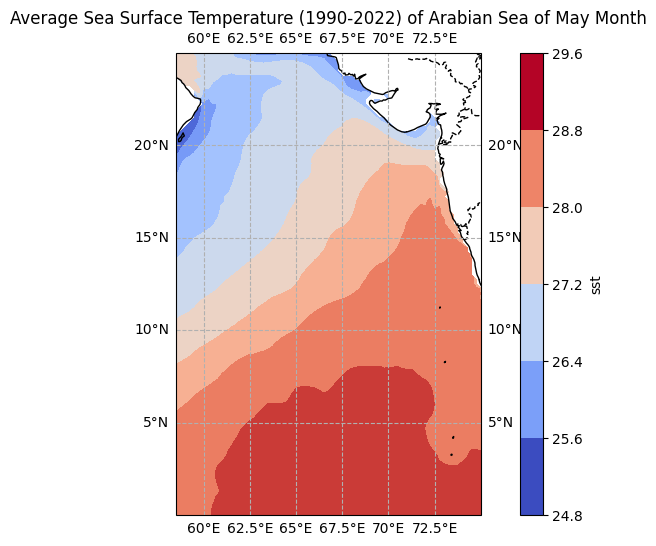

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# Filter data for the year range 2020 to 2022
sst_data_filtered_AS = data_30_years_AS.sel(time=slice('1990-05-01', '2022-05-31'))

# Calculate the mean SST over the time period
sst_data_mean_AS = sst_data_filtered_AS['sst'].mean(dim='time') - 273.15

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of average SST with contours
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_data_mean_AS.plot.contourf(ax=ax, transform=projection, cmap='coolwarm')
plt.title('Average Sea Surface Temperature (1990-2022) of Arabian Sea of May Month')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

sst_plot = plt.contourf(sst_data_mean_AS.longitude, sst_data_mean_AS.latitude, sst_data_mean_AS,
                        transform=projection, cmap='coolwarm')
#plt.colorbar(sst_plot, label='Sea Surface Temperature (°C)')
#plt.title('Sea Surface Temperature for the Year 2023')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()


### **Mean Sea Surface Temperature (May) of Arabian Sea of year 2023**

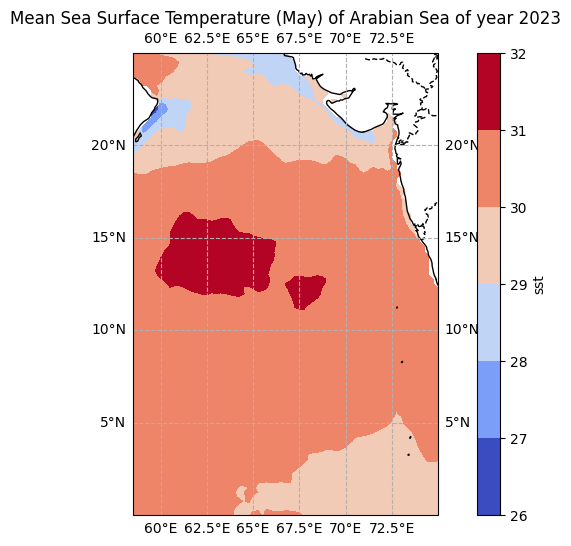

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter data for the month of May and the year range 1990 to 2022
sst_data_may = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 5) &
                                        (data_30_years_AS['sst'].time.dt.year >= 2023) &
                                        (data_30_years_AS['sst'].time.dt.year <= 2023))

# Calculate the mean SST over the time period for the month of May
sst_data_may_mean_AS = sst_data_may.mean(dim='time') - 273.15

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of average SST with contours for the month of May
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_data_may_mean_AS.plot.contourf(ax=ax, transform=projection, cmap='coolwarm')
plt.title('Mean Sea Surface Temperature (May) of Arabian Sea of year 2023')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER



plt.show()


### **Difference/change in Mean Sea Surface Temperature (May) of Arabian Sea between 2023 and 1990 - 2022**

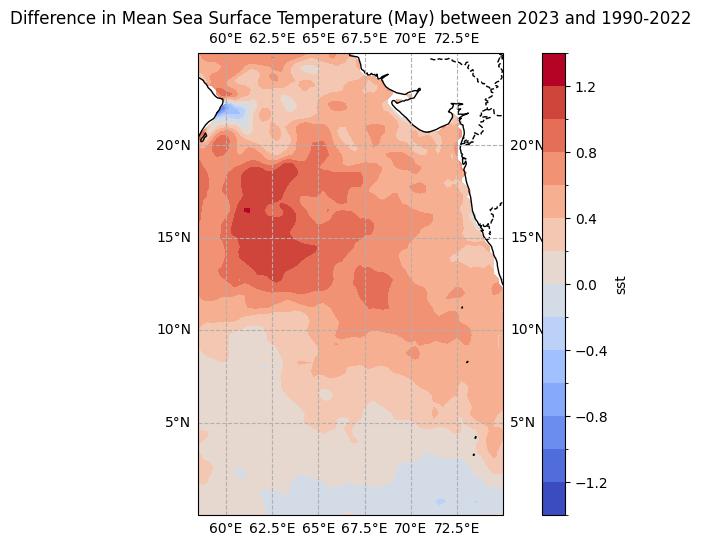

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter data for May 2023
sst_data_may_2023 = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 5) &
                                              (data_30_years_AS['sst'].time.dt.year == 2023))

# Filter data for May from 1990 to 2022
sst_data_may_1990_2022_AS = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 5) &
                                                   (data_30_years_AS['sst'].time.dt.year >= 1990) &
                                                   (data_30_years_AS['sst'].time.dt.year <= 2022))

# Calculate the mean SST for May 2023
sst_data_may_2023_mean_AS = sst_data_may_2023.mean(dim='time') - 273.15

# Calculate the mean SST for May from 1990 to 2022
sst_data_may_1990_2022_mean_AS = sst_data_may_1990_2022_AS.mean(dim='time') - 273.15

# Calculate the difference
sst_difference_AS = sst_data_may_2023_mean_AS - sst_data_may_1990_2022_mean_AS

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of the difference in mean SST for May 2023 and May from 1990 to 2022
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_difference_AS.plot.contourf(ax=ax, transform=projection, cmap='coolwarm', levels=15)
plt.title('Difference in Mean Sea Surface Temperature (May) between 2023 and 1990-2022')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()


### **Mean Sea Surface Temperature (June) of Arabian Sea (1990-2022)**

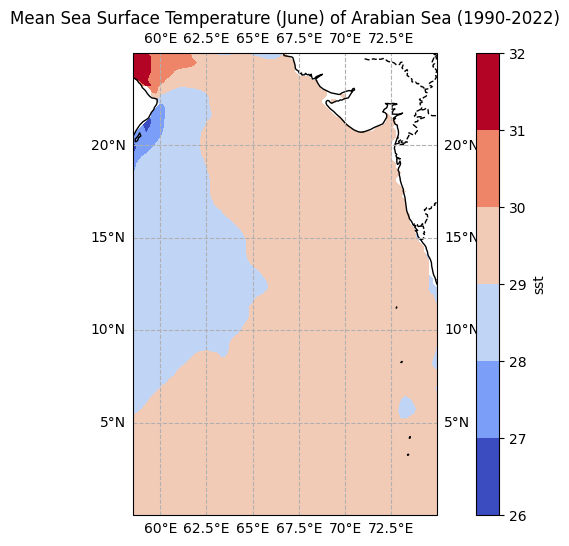

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter data for the month of May and the year range 1990 to 2022
sst_data_may_AS = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 6) &
                                        (data_30_years_AS['sst'].time.dt.year >= 1990) &
                                        (data_30_years_AS['sst'].time.dt.year <= 2022))

# Calculate the mean SST over the time period for the month of May
sst_data_may_mean_AS = sst_data_may_AS.mean(dim='time') - 273.15

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of average SST with contours for the month of May
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_data_may_mean_AS.plot.contourf(ax=ax, transform=projection, cmap='coolwarm')
plt.title('Mean Sea Surface Temperature (June) of Arabian Sea (1990-2022)')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()


### **Mean Sea Surface Temperature (June) of Arabian Sea of year 2023**

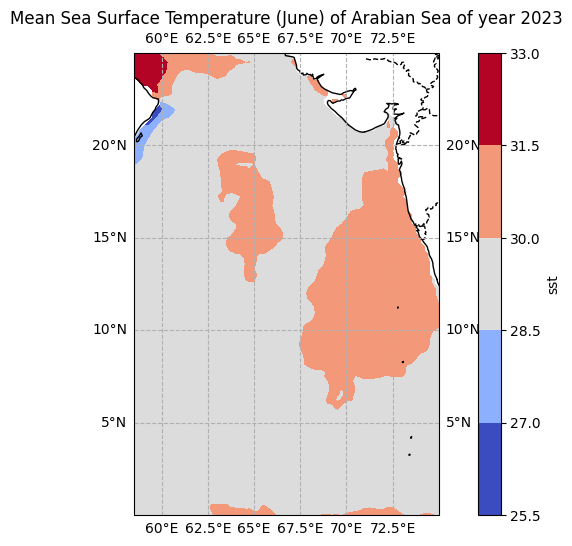

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter data for the month of May and the year range 1990 to 2022
sst_data_may = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 6) &
                                        (data_30_years_AS['sst'].time.dt.year >= 2023) &
                                        (data_30_years_AS['sst'].time.dt.year <= 2023))

# Calculate the mean SST over the time period for the month of May
sst_data_may_mean_AS = sst_data_may.mean(dim='time') - 273.15

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of average SST with contours for the month of May
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_data_may_mean_AS.plot.contourf(ax=ax, transform=projection, cmap='coolwarm')
plt.title('Mean Sea Surface Temperature (June) of Arabian Sea of year 2023')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()


### **Difference/change in Mean Sea Surface Temperature (June) of Arabian Sea between 2023 and 1990 - 2022**

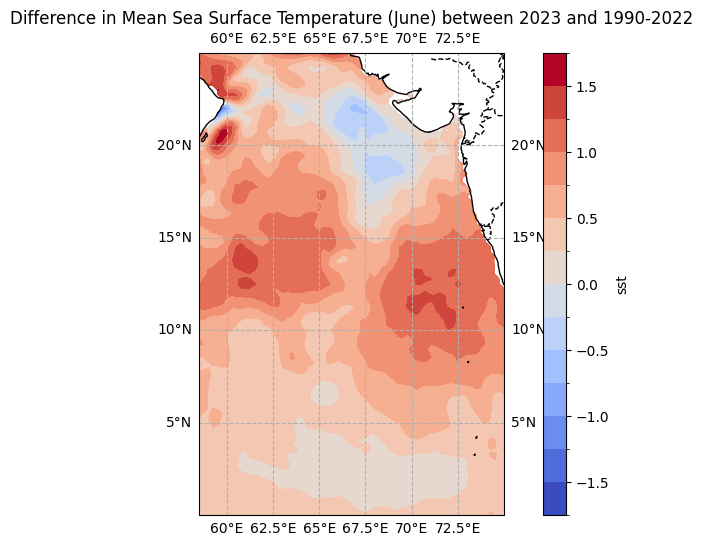

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter data for May 2023
sst_data_may_2023 = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 6) &
                                              (data_30_years_AS['sst'].time.dt.year == 2023))

# Filter data for May from 1990 to 2022
sst_data_may_1990_2022_AS = data_30_years_AS['sst'].sel(time=(data_30_years_AS['sst'].time.dt.month == 6) &
                                                   (data_30_years_AS['sst'].time.dt.year >= 1990) &
                                                   (data_30_years_AS['sst'].time.dt.year <= 2022))

# Calculate the mean SST for May 2023
sst_data_may_2023_mean_AS = sst_data_may_2023.mean(dim='time') - 273.15

# Calculate the mean SST for May from 1990 to 2022
sst_data_may_1990_2022_mean_AS = sst_data_may_1990_2022_AS.mean(dim='time') - 273.15

# Calculate the difference
sst_difference_AS = sst_data_may_2023_mean_AS - sst_data_may_1990_2022_mean_AS

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Plot the map of the difference in mean SST for May 2023 and May from 1990 to 2022
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)
ax.coastlines()
sst_contour = sst_difference_AS.plot.contourf(ax=ax, transform=projection, cmap='coolwarm', levels=15)
plt.title('Difference in Mean Sea Surface Temperature (June) between 2023 and 1990-2022')

# Add state boundaries
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linestyle='--')

# Add latitude and longitude scales
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()


### ***Bay of Bengal***

In [29]:
import xarray as xr
import matplotlib.pyplot as plt

data_30_years_BoB = xr.open_dataset("/content/drive/MyDrive/Biporjoy_project_data/years_30_data_Bay_of_Bengal.nc")
data_30_years_BoB

<xarray.Dataset>
Dimensions:    (longitude: 77, latitude: 75, time: 408)
Coordinates:
  * longitude  (longitude) float32 80.2 80.45 80.7 80.95 ... 98.7 98.95 99.2
  * latitude   (latitude) float32 23.2 22.95 22.7 22.45 ... 5.45 5.2 4.95 4.7
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-12-01
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-16 03:40:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### **Mean Sea Surface Temperature (°C) per year (1990 - 2023) of Bay of Bengal**

In [30]:
import plotly.express as px
import numpy as np


# Group data by year and calculate the mean over the time dimension
sst_data_mean_yearly_BoB = data_30_years_BoB['sst'].groupby('time.year').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_mean_yearly_BoB_celsius = sst_data_mean_yearly_BoB - 273.15

# Reshape data for Plotly
sst_data_mean_yearly_BoB_reshaped = sst_data_mean_yearly_BoB_celsius.mean(dim=('latitude', 'longitude'))  # Take the mean over latitude and longitude

# Create Plotly figure
fig_BoB = px.line(x=sst_data_mean_yearly_BoB_reshaped.coords['year'], y=sst_data_mean_yearly_BoB_reshaped.values, title='Mean Sea Surface Temperature per Year of Bay of Bengal')

# Update layout properties for white background, black plotted lines, and black x and y axes
fig_BoB.update_layout(
    plot_bgcolor='white',  # Set background color to white
    xaxis=dict(
        title='Year',
        titlefont=dict(color='black'),  # Set x-axis title color to black
        tickfont=dict(color='black'),   # Set x-axis tick color to black
        showgrid=False,
        gridcolor='black',              # Set x-axis grid color to black
        linecolor = "black",
        linewidth = 1
    ),
    yaxis=dict(
        title='Mean Sea Surface Temperature (°C)',
        titlefont=dict(color='black'),  # Set y-axis title color to black
        tickfont=dict(color='black'),   # Set y-axis tick color to black
        range=[26, sst_data_mean_yearly_BoB_celsius.max()],
        showgrid= False,
        gridcolor='black',               # Set y-axis grid color to black
        linecolor = "black",
        linewidth = 1
    )
)

# Update trace color to black
fig_BoB.update_traces(line=dict(color='black'))

# Calculate trend line using linear regression
x = sst_data_mean_yearly_BoB_reshaped.coords['year'].values
y = sst_data_mean_yearly_BoB_reshaped.values
m, b = np.polyfit(x, y, 1)  # Fit a linear trend line
trend_line = m * x + b

# Add trend line to the plot
fig_BoB.add_scatter(x=x, y=trend_line, mode='lines', name='Trend Line')

# Update hover template
fig_BoB.update_traces(hovertemplate='Year: %{x}<br>SST: %{y:.2f}°C')

# Show the plot
fig_BoB.show()


In [31]:
import plotly.express as px

# Group data by month and calculate the mean over the time dimension
sst_data_monthly_mean_BoB = data_30_years_BoB['sst'].groupby('time.month').mean(dim='time')

# Convert sea surface temperature from Kelvin to Celsius
sst_data_monthly_mean_BoB_celsius = sst_data_monthly_mean_BoB - 273.15

# Take the mean over latitude and longitude
sst_data_monthly_mean_celsius_BoB_reshaped = sst_data_monthly_mean_BoB_celsius.mean(dim=('latitude', 'longitude'))

# Create Plotly figure
fig = px.line(x=sst_data_monthly_mean_celsius_BoB_reshaped.coords['month'], y=sst_data_monthly_mean_celsius_BoB_reshaped.values, title='Mean Sea Surface Temperature per Month (1990-2023) of Bay of Bengal')
fig.update_xaxes(title='Month', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_yaxes(title='Mean Sea Surface Temperature (°C)')
fig.show()


### **Central Pressure and Maximum Sustained Wind Speed against cyclone duration**

In [38]:
# Update layout
fig.update_layout(
    title="Estimated Centre Pressure (hPa) and Estimated Maximum Sustained Wind (kt) vs. Date",
    xaxis_title="Date",
    yaxis=dict(
        title="Estimated Centre Pressure (hPa)",
        side="left",
        color="blue",
        ticks="inside",
        tickvals=list(range(920, 1100, 10)),  # Values from 940 to 1000 with a step of 10
        ticktext=list(range(920, 1100, 10))  # Same values as tickvals
    ),
    yaxis2=dict(
        title="Estimated Maximum Sustained Wind (kt)",
        overlaying="y",
        side="right",
        color="orange",
        ticks="inside",
        tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],  # Example values, adjust as needed
        ticktext=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]   # Example labels, adjust as needed
    )
)


### **Precipitation**



In [32]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the NetCDF file
precipitation_data = xr.open_dataset('/content/drive/MyDrive/Biporjoy_project_data/Precipitation_june_23_new.nc')
precipitation_data

<xarray.Dataset>
Dimensions:    (longitude: 169, latitude: 131, time: 720)
Coordinates:
  * longitude  (longitude) float32 57.8 58.05 58.3 58.55 ... 99.3 99.55 99.8
  * latitude   (latitude) float32 32.5 32.25 32.0 31.75 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2023-06-01 ... 2023-06-30T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-22 09:29:04 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [34]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter


tp = precipitation_data["tp"]

# Loop through each day from June 6 to June 20
for day in range(6, 21):
    # Select data for the current day
    tp_day = np.sum(tp.sel(time=f'2023-06-{day}'), axis=0) * 1000  # Summing over time axis and converting to mm

    # Mask invalid values (values less than or equal to zero)
    tp_day = np.ma.masked_less_equal(tp_day, 0)

    # Create a map plot
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Set extent to fit within specified bounds
    ax.set_extent([57.8, 96.5, 0, 32.7], crs=ccrs.PlateCarree())

    # Add latitude and longitude lines
    ax.gridlines(draw_labels=True)

    # Add country and state boundaries
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Plot the total precipitation data with enhancements
    lon_2d, lat_2d = np.meshgrid(tp.longitude, tp.latitude)  # Accessing longitude and latitude from original dataset
    contour = plt.contourf(lon_2d, lat_2d, tp_day,
                           levels=np.linspace(0, 200, 51),  # Adjust contour levels for better resolution
                           cmap='jet',  # Choose a colormap suitable for precipitation data
                           norm=colors.LogNorm(vmin=1, vmax=200),  # Set logarithmic scale for colorbar
                           transform=ccrs.PlateCarree())

    # Add colorbar (vertical) with 9 ticks and format the tick labels
    cbar = plt.colorbar(contour, orientation='vertical', pad=0.05, ticks=np.linspace(1, 200, 9))
    cbar.set_label('Total Precipitation (mm)')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    plt.title(f'Total Precipitation 2023-06-{day}')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.